In [0]:
#import pandas as pd
import pandas as pd

In [0]:
column_names = ['buy_price', 'maintain_price', 'doors', 'persons', 'lug_boot', 'safety', 'score']
df = pd.read_csv('car.data',names=column_names)

In [0]:
df.head()

,buy_price,maintain_price,doors,persons,lug_boot,safety,score
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [0]:
df.score.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: score, dtype: int64

In [0]:
# Last column as Y
Y = df[df.columns[-1]] 

In [0]:
# Other columns as X
X = df.drop([df.columns[-1]], axis=1)

In [0]:
X.buy_price.iloc[1]

'vhigh'

In [0]:
Y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: score, dtype: object

In [0]:
X.count()

buy_price         1728
maintain_price    1728
doors             1728
persons           1728
lug_boot          1728
safety            1728
dtype: int64

In [0]:
# Transforming categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
labelencoder_buyprice = LabelEncoder().fit(X.buy_price)
labelencoder_maintainprice = LabelEncoder().fit(X.maintain_price)
labelencoder_lugboot = LabelEncoder().fit(X.lug_boot)
labelencoder_safery = LabelEncoder().fit(X.safety)
labelencoder_doors = LabelEncoder().fit(X.doors)
labelencoder_persons = LabelEncoder().fit(X.persons)

In [0]:
X.buy_price = labelencoder_buyprice.transform(X.buy_price)
X.maintain_price = labelencoder_maintainprice.transform(X.maintain_price)
X.lug_boot = labelencoder_lugboot.transform(X.lug_boot)
X.safety = labelencoder_safery.transform(X.safety)
X.doors = labelencoder_doors.transform(X.doors)
X.persons = labelencoder_persons.transform(X.persons)

In [0]:
X.head()

,buy_price,maintain_price,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [0]:
X.tail()

,buy_price,maintain_price,doors,persons,lug_boot,safety
1723,1,1,3,2,1,2
1724,1,1,3,2,1,0
1725,1,1,3,2,0,1
1726,1,1,3,2,0,2
1727,1,1,3,2,0,0


In [0]:
labelencoder_target = LabelEncoder().fit(Y)
Y = labelencoder_target.transform(Y)

In [0]:
X.head()

,buy_price,maintain_price,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [0]:
# Buy Price vs Safety
buy_safety = X[["buy_price", "safety"]]

In [0]:
# buy_safety[:10].plot.scatter(x="buy_price", y="safety")

In [0]:
# Correlation
X.corr()

,buy_price,maintain_price,doors,persons,lug_boot,safety
buy_price,1.0,0.0,0.0,0.0,0.0,0.0
maintain_price,0.0,1.0,0.0,0.0,0.0,0.0
doors,0.0,0.0,1.0,0.0,0.0,0.0
persons,0.0,0.0,0.0,1.0,0.0,0.0
lug_boot,0.0,0.0,0.0,0.0,1.0,0.0
safety,0.0,0.0,0.0,0.0,0.0,1.0


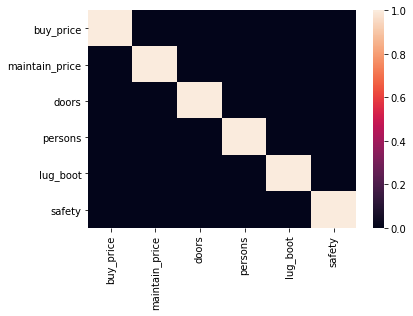

In [0]:
# Correlation head map
import seaborn as sn
sn.heatmap(X.corr())

In [0]:
# Splitting data into training and testing set. For this purpose we will use the standard 70-30 split and then we will apply the same standard\
# technique on 10-fold cross validation.
from sklearn.model_selection import train_test_split

train_set, test_set, train_label, test_label = train_test_split(X, Y, test_size=0.33, random_state=13)

In [0]:
# 10-Fold cross validation
from sklearn.model_selection import KFold, StratifiedKFold

n_fold = 10 

# init KFold 
kfold = KFold(n_splits=n_fold, random_state=13)

# Startified
startified_kfold = StratifiedKFold(n_splits=n_fold, random_state=13)

In [0]:
set(Y)

{0, 1, 2, 3}

In [0]:
X

,buy_price,maintain_price,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2
...,...,...,...,...,...,...
1723,1,1,3,2,1,2
1724,1,1,3,2,1,0
1725,1,1,3,2,0,1
1726,1,1,3,2,0,2


In [0]:
# Converting pandas dataframe to numpy array, as sklearn doesnt handle pandas dataframe to well.
x = X.to_numpy()

In [0]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

classifier = LogisticRegression(random_state=13)

In [0]:
# need to confirm what others are using for Kcross validation - the whole dataset or the data training dataset we get after 
# we split the whole dataset into training and testing using 70-30 ratio.

# Without Startified

accurary = {}
confusion_matrix_dict = {}
counter = 0
for train_index, test_index in kfold.split(x):
    X_train, X_test, y_train, y_test = x[train_index], x[test_index], Y[train_index], Y[test_index]
    
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Testing the classifier
    accurary[counter] = classifier.score(X_test, y_test)

    # For confusion matrix we need the predictions 
    predictions = classifier.predict(X_test)

    # Confusion matrix
    conf = confusion_matrix(y_test, predictions)
    confusion_matrix_dict[counter] = conf
    counter +=1

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

In [0]:
confusion_matrix_dict[3]

array([[ 15,  23,   8],
       [ 20, 107,   0],
       [  0,   0,   0]])

In [0]:
for key, value in accurary.items():
    print(value)

0.8265895953757225
0.6878612716763006
0.6820809248554913
0.7052023121387283
0.6589595375722543
0.7052023121387283
0.5838150289017341
0.6069364161849711
0.5872093023255814
0.4941860465116279


In [0]:
confusion_matrix_dict[9]

array([[ 0,  0, 15,  0],
       [ 8,  0, 30,  0],
       [10,  0, 85,  0],
       [13,  0, 11,  0]])

## Startified KFold cross validation

In [0]:
star_accurary = {}
star_confusion_matrix_dict = {}
star_classifier_object = {}
star_counter = 0
for train_index, test_index in startified_kfold.split(x, Y):
    X_train, X_test, y_train, y_test = x[train_index], x[test_index], Y[train_index], Y[test_index]
    
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Testing the classifier
    star_accurary[star_counter] = classifier.score(X_test, y_test)

    # For confusion matrix we need the predictions 
    predictions = classifier.predict(X_test)

    # saving classifier object
    star_classifier_object[star_counter] = classifier

    # Confusion matrix
    conf = confusion_matrix(y_test, predictions)
    star_confusion_matrix_dict[star_counter] = conf
    star_counter +=1

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

In [0]:
star_classifier_object

{0: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=13, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 1: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=13, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 2: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=13, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 3: 

In [0]:
for i, j in star_accurary.items():
    print(f"Fold:{i} --> {j*100}%")

Fold:0 --> 70.11494252873564%
Fold:1 --> 59.195402298850574%
Fold:2 --> 67.24137931034483%
Fold:3 --> 63.2183908045977%
Fold:4 --> 65.3179190751445%
Fold:5 --> 65.69767441860465%
Fold:6 --> 69.76744186046511%
Fold:7 --> 66.86046511627907%
Fold:8 --> 67.44186046511628%
Fold:9 --> 67.2514619883041%


In [0]:
# # Plotting decision boundary 
x_min, x_max = x.min() - .5, x.max() + .5
y_min, y_max = Y.min() - .5, Y.max() + .5

In [0]:
# import numpy as np
# h = .02  # step size in the mesh
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

In [0]:
# # test
# from sklearn import datasets
# iris = datasets.load_iris()
# X = iris.data[:, :2]  # we only take the first two features.
# Y = iris.target

# logreg = LogisticRegression(C=1e5)

# # Create an instance of Logistic Regression Classifier and fit the data.
# logreg.fit(X, Y)

# # Plot the decision boundary. For that, we will assign a color to each
# # point in the mesh [x_min, x_max]x[y_min, y_max].
# x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
# y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

In [0]:
X.columns

Index(['buy_price', 'maintain_price', 'doors', 'persons', 'lug_boot',
       'safety'],
      dtype='object')

In [0]:
# Display and predict the class of vhigh,low,4,more,small,med

to_predict = pd.DataFrame(data=[['vhigh', 'low', '4', 'more', 'small', 'med']], columns=['buy_price', 'maintain_price', 'doors', 'persons', 'lug_boot','safety'])

In [0]:
to_predict

,buy_price,maintain_price,doors,persons,lug_boot,safety
0,vhigh,low,4,more,small,med


In [0]:
labelencoder_buyprice.transform(to_predict.buy_price)

array([3])

In [0]:
to_predict.buy_price = labelencoder_buyprice.transform(to_predict.buy_price)
to_predict.maintain_price = labelencoder_maintainprice.transform(to_predict.maintain_price)
to_predict.lug_boot = labelencoder_lugboot.transform(to_predict.lug_boot)
to_predict.safety = labelencoder_safery.transform(to_predict.safety)
to_predict.doors = labelencoder_doors.transform(to_predict.doors)
to_predict.persons = labelencoder_persons.transform(to_predict.persons)

In [0]:
to_predict

,buy_price,maintain_price,doors,persons,lug_boot,safety
0,3,1,2,2,2,2


In [0]:
final_prediction = star_classifier_object[6].predict(to_predict.to_numpy())

In [0]:
labelencoder_target.classes_

array(['acc', 'good', 'unacc', 'vgood'], dtype=object)

In [0]:
for index, class_ in enumerate(labelencoder_target.classes_):
    if index == final_prediction[0]:
        print(f"The prediction for car with values [vhigh,low,4,more,small,med] is {class_}")
    

The prediction for car with values [vhigh,low,4,more,small,med] is unacc
